In [1]:
# libraries required for feature extraction using MobileNet version:1

In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
import seaborn as sns
import tensorflow as tf
from imutils import paths
from itertools import cycle
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

/home/sanjeev/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#base_path = '/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Plots/X.npy'' # Data Path 
base_path = '/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/bytes_images/'
img_list = glob.glob(os.path.join(base_path, '*/*.png'))

In [3]:
# classes in malimg data
categories = os.listdir(base_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

In [4]:
cur_dir = os.getcwd()
os.chdir(base_path)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family

for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
fam = []
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
        fam.append(list_fams[label])
    label += 1
num_classes = label

Label: 0	Family:           Gatak	Number of images: 1013
Label: 1	Family:    Kelihos_ver1	Number of images: 398
Label: 2	Family:    Kelihos_ver3	Number of images: 2942
Label: 3	Family:        Lollipop	Number of images: 2478
Label: 4	Family:  Obfuscator.ACY	Number of images: 1228
Label: 5	Family:          Ramnit	Number of images: 1541
Label: 6	Family:           Simda	Number of images: 42
Label: 7	Family:          Tracur	Number of images: 751
Label: 8	Family:           Vundo	Number of images: 475


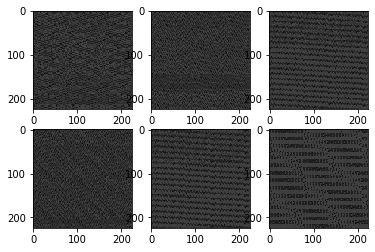

In [5]:
# Sample images from dataset
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [6]:
# Using Mobile net V1 as base model for feature extraction 

In [8]:
x = np.load('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3__Small_X.npy')
y = np.load('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3__Small_y.npy')

## Classification using SVM(Support Vector Meachine/Classifier)

In [9]:
# libraries required for Naive_Bayes classification

In [10]:
import pandas as pd
import disarray as da
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, matthews_corrcoef, roc_curve, auc

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.21, random_state=42)

In [12]:
print("X_Train:", X_train.shape)
print("Y_Train:", y_train.shape)
print("X_Test:", X_test.shape)
print("Y_Test:", y_test.shape)

X_Train: (8697, 1024)
Y_Train: (8697,)
X_Test: (2312, 1024)
Y_Test: (2312,)


In [13]:
svc = SVC(kernel = 'linear',C = 0.1)

In [14]:
%%time
svc.fit(X_train,y_train)

CPU times: user 11.5 s, sys: 77.4 ms, total: 11.6 s
Wall time: 11.6 s


SVC(C=0.1, kernel='linear')

In [16]:
print("Testing Accuracy:", round((svc.score(X_test, y_test) * 100), 2))

Testing Accuracy: 87.2


In [17]:
%%time
y_pred = svc.predict(X_test)

CPU times: user 4.37 s, sys: 11.4 ms, total: 4.38 s
Wall time: 4.38 s


In [18]:
%%time
ls = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(int(round(ls[0]*100, 0)), int(round(ls[1]*100, 0)), int(round(ls[2]*100, 0)))

87 87 87
CPU times: user 10.9 ms, sys: 3.87 ms, total: 14.7 ms
Wall time: 13.4 ms


In [19]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

                precision    recall  f1-score   support

         Gatak       0.81      0.86      0.83       209
  Kelihos_ver1       0.88      0.99      0.93       108
  Kelihos_ver3       0.99      0.99      0.99       614
      Lollipop       0.90      0.77      0.83       590
Obfuscator.ACY       0.84      0.94      0.89       234
        Ramnit       0.80      0.82      0.81       310
         Simda       0.00      0.00      0.00         0
        Tracur       0.63      0.67      0.65       147
         Vundo       0.85      0.90      0.87       100

      accuracy                           0.87      2312
     macro avg       0.75      0.77      0.76      2312
  weighted avg       0.88      0.87      0.87      2312



In [20]:
# GridSearchCV

In [21]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf']
             }

In [22]:
%%time
# Perform cross-validation and grid search to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

CPU times: user 126 µs, sys: 15 µs, total: 141 µs
Wall time: 152 µs


In [23]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 1h 5min 19s, sys: 5.15 s, total: 1h 5min 24s
Wall time: 1h 5min 24s


GridSearchCV(cv=5, estimator=SVC(C=0.1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [24]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [25]:
print("Accuracy on testing set: {:.3f}".format(grid_search.score(X_test, y_test)))

Accuracy on testing set: 0.946


In [26]:
y_pred = grid_search.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
                 precision    recall  f1-score   support

         Gatak       0.93      0.96      0.95       221
  Kelihos_ver1       0.98      0.98      0.98       121
  Kelihos_ver3       1.00      1.00      1.00       617
      Lollipop       0.92      0.95      0.94       505
Obfuscator.ACY       0.93      0.90      0.92       263
        Ramnit       0.93      0.89      0.91       317
         Simda       0.20      0.17      0.18         6
        Tracur       0.88      0.87      0.87       156
         Vundo       0.96      0.96      0.96       106

      accuracy                           0.95      2312
     macro avg       0.86      0.85      0.86      2312
  weighted avg       0.95      0.95      0.95      2312



In [27]:
list_fams = sorted(label_dict.keys())

In [28]:
classification_metrices = metrics.classification_report(y_test, y_pred, output_dict=True, target_names= list_fams)
df = pd.DataFrame(classification_metrices).transpose()
df.to_csv('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3_Small_SVM.csv')

Plotting the confusion matrix


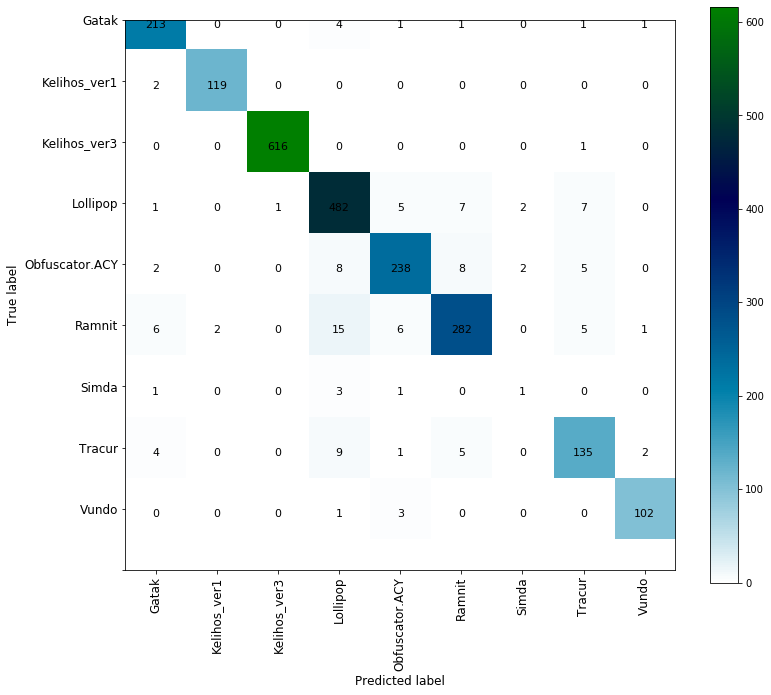

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Plotting the confusion matrix")
conf_mat = np.around(conf_matrix, decimals=2)  
figure = plt.gcf()
figure.set_size_inches(11, 10)
plt.imshow(conf_mat, interpolation='nearest', cmap='ocean_r')

for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col,row), ha='center', va='top', fontsize=11)
        
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=12)
plt.yticks(range(len(list_fams)+1), list_fams, fontsize=12)

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.tight_layout()
plt.colorbar()
plt.savefig('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3_Small_SVM.eps', bbox_inches='tight')
plt.savefig('/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3_Small_SVM.png', bbox_inches='tight')

plt.show()

In [30]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)

In [31]:
pd.set_option('display.max_columns', None)  # force to display any number of columns.

In [32]:
#calculating true positives, false positives, true negatives and false negatives from confusion matrix
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [33]:
FP, FN, TP, TN

(array([16,  2,  1, 40, 17, 21,  4, 19,  4]),
 array([ 8,  2,  1, 23, 25, 35,  5, 21,  4]),
 array([213, 119, 616, 482, 238, 282,   1, 135, 102]),
 array([2075, 2189, 1694, 1767, 2032, 1974, 2302, 2137, 2202]))

In [34]:
#calculating false_omission_rate
NPV = TN/(TN+FN)
FOR = 1-NPV
FOR

array([0.00384061, 0.00091283, 0.00058997, 0.01284916, 0.01215362,
       0.0174216 , 0.00216732, 0.00973123, 0.00181324])

In [35]:
data = df.da.export_metrics(metrics_to_include=['true_positive_rate', 'true_negative_rate', 'false_positive_rate', 
                                              'false_negative_rate', 'false_discovery_rate'])

In [36]:
for num, fam in zip(range(25), list_fams):
    data.rename(columns={data.columns[num]:fam}, inplace=True)

data1 = data.drop(columns=['micro-average'])
data1 = data1.T
# data.drop(df.tail(1).index,inplace=True)

data1['false_omission_rate'] = list(FOR)

data1

,true_positive_rate,true_negative_rate,false_positive_rate,false_negative_rate,false_discovery_rate,false_omission_rate
Gatak,0.963801,0.992348,0.007652,0.036199,0.069869,0.003841
Kelihos_ver1,0.983471,0.999087,0.000913,0.016529,0.016529,0.000913
Kelihos_ver3,0.998379,0.999410,0.000590,0.001621,0.001621,0.000590
Lollipop,0.954455,0.977864,0.022136,0.045545,0.076628,0.012849
Obfuscator.ACY,0.904943,0.991703,0.008297,0.095057,0.066667,0.012154
Ramnit,0.889590,0.989474,0.010526,0.110410,0.069307,0.017422
Simda,0.166667,0.998265,0.001735,0.833333,0.800000,0.002167
Tracur,0.865385,0.991187,0.008813,0.134615,0.123377,0.009731
Vundo,0.962264,0.998187,0.001813,0.037736,0.037736,0.001813


In [37]:
for i in data1:
    print('Average of', i, '-->', round((np.average(data1[i])*100), 4))

Average of true_positive_rate --> 85.4328
Average of true_negative_rate --> 99.3058
Average of false_positive_rate --> 0.6942
Average of false_negative_rate --> 14.5672
Average of false_discovery_rate --> 14.0193
Average of false_omission_rate --> 0.6831


In [38]:
#MCC value
print('MCC Score:', round(matthews_corrcoef(y_test, y_pred), 2))

MCC Score: 0.94


In [39]:
print("micro_precision :", metrics.precision_score(y_test, y_pred, average='micro'))
print("micro_recall :", metrics.recall_score(y_test, y_pred, average='micro'))
print("micro_f1_score :", metrics.f1_score(y_test, y_pred, average='micro'))

micro_precision : 0.9463667820069204
micro_recall : 0.9463667820069204
micro_f1_score : 0.9463667820069204


In [40]:
print("macro_precision :", metrics.precision_score(y_test, y_pred, average='macro'))
print("macro_recall :", metrics.recall_score(y_test, y_pred, average='macro'))
print("macro_f1_score :", metrics.f1_score(y_test, y_pred, average='macro'))

macro_precision : 0.8598074345467381
macro_recall : 0.8543283314995631
macro_f1_score : 0.8567577432114594


In [41]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))  
y_test = enc.transform(y_test.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1))

In [42]:
y_test = y_test.toarray()
y_pred = y_pred.toarray()

In [43]:
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

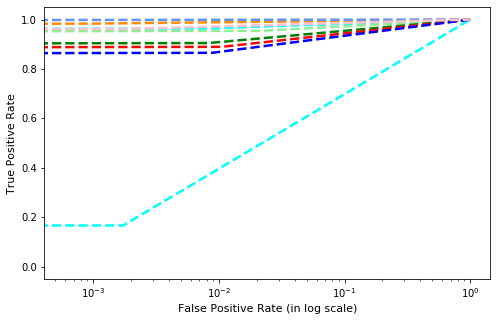

In [44]:
# Compute macro-average ROC curve and ROC area

n_classes = 9
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2.5   # line width
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen', 'green', 'red', 'cyan', 'blue', 
                 'pink', 'purple', 'brown', 'coral', 'chocolate', 'indigo', 'navy'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='dashed', lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xscale("log")
plt.xlabel('False Positive Rate (in log scale)', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.savefig("/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3_Small_SVM.eps", bbox_inches='tight')
plt.savefig("/home/sanjeev/DL_Exp_Kajal/DL_Prasad_Exp/Microsoft_PoC/Experiment_2/bytes_plots/MobileNetV3_Small_SVM.png", bbox_inches='tight')

plt.show()